The first library we can try is CSV:

In [79]:
import csv

In [80]:
with open('survey_results_public.csv', newline='', encoding="utf8") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count+= 1
        else:
            line_count += 1
    print(f'Processed {line_count} lines.')

Column names are Respondent, Hobby, OpenSource, Country, Student, Employment, FormalEducation, UndergradMajor, CompanySize, DevType, YearsCoding, YearsCodingProf, JobSatisfaction, CareerSatisfaction, HopeFiveYears, JobSearchStatus, LastNewJob, AssessJob1, AssessJob2, AssessJob3, AssessJob4, AssessJob5, AssessJob6, AssessJob7, AssessJob8, AssessJob9, AssessJob10, AssessBenefits1, AssessBenefits2, AssessBenefits3, AssessBenefits4, AssessBenefits5, AssessBenefits6, AssessBenefits7, AssessBenefits8, AssessBenefits9, AssessBenefits10, AssessBenefits11, JobContactPriorities1, JobContactPriorities2, JobContactPriorities3, JobContactPriorities4, JobContactPriorities5, JobEmailPriorities1, JobEmailPriorities2, JobEmailPriorities3, JobEmailPriorities4, JobEmailPriorities5, JobEmailPriorities6, JobEmailPriorities7, UpdateCV, Currency, Salary, SalaryType, ConvertedSalary, CurrencySymbol, CommunicationTools, TimeFullyProductive, EducationTypes, SelfTaughtTypes, TimeAfterBootcamp, HackathonReasons, 

It's pretty useful but doesn't provide easy manipulation of columns. Next, let us take a look at pandas dataframes:

In [81]:
import pandas as pd

Save the csv into a variable dataframe:

In [82]:
df=pd.read_csv("survey_results_public.csv", encoding ="utf8", low_memory=False)

Now we can query the dataframe by column numbers

In [83]:
df[df.columns[1]]

0        Yes
1        Yes
2        Yes
3         No
4        Yes
        ... 
98850    Yes
98851     No
98852    Yes
98853    Yes
98854    Yes
Name: Hobby, Length: 98855, dtype: object

Or we can utilize names:

In [84]:
df["Student"]

0                    No
1                    No
2                    No
3                    No
4        Yes, part-time
              ...      
98850               NaN
98851    Yes, full-time
98852    Yes, full-time
98853                No
98854               NaN
Name: Student, Length: 98855, dtype: object

Now, the data we need is: Parent's Education, Education, Reporting Responsibility, Employment, Reporting Code, and Salary.

In [85]:
new_df = df[['Respondent', 'FormalEducation', 'EthicalImplications', 'Employment', 'EthicsReport', 'ConvertedSalary']].copy()

And we can verify that our dataframe is correct (columns are split into mutiple lines of entries):

In [86]:
new_df

,Respondent,FormalEducation,EthicalImplications,Employment,EthicsReport,ConvertedSalary
0,1,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,Employed part-time,"Yes, and publicly",NaN
1,3,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,Employed full-time,Depends on what it is,70841.0
2,4,Associate degree,NaN,Employed full-time,NaN,NaN
3,5,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,Employed full-time,"Yes, but only within the company",NaN
4,7,Some college/university study without earning ...,Yes,Employed full-time,"Yes, but only within the company",21426.0
...,...,...,...,...,...,...
98850,101513,NaN,NaN,NaN,NaN,NaN
98851,101531,NaN,NaN,"Not employed, but looking for work",NaN,NaN
98852,101541,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,Employed full-time,NaN,NaN
98853,101544,Some college/university study without earning ...,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN


Given this new table, we can now output to another csv which is purely for the columns we're interested in.

In [87]:
new_df.to_csv('survey_results_public_important.csv', index=False, encoding='utf-8')

# Now we need to clean up the data. Only use entries that have ALL the fields entered

In [88]:
cleaned_survey_results = new_df.copy().dropna()

In [89]:
cleaned_survey_results

,Respondent,FormalEducation,EthicalImplications,Employment,EthicsReport,ConvertedSalary
1,3,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,Employed full-time,Depends on what it is,70841.0
4,7,Some college/university study without earning ...,Yes,Employed full-time,"Yes, but only within the company",21426.0
5,8,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Unsure / I don't know,Employed full-time,Depends on what it is,41671.0
6,9,Some college/university study without earning ...,Yes,Employed full-time,"Yes, but only within the company",120000.0
8,11,Some college/university study without earning ...,Yes,Employed full-time,"Yes, and publicly",250000.0
...,...,...,...,...,...,...
89932,99868,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,"Not employed, but looking for work","Yes, and publicly",97233.0
89946,100383,"Secondary school (e.g. American high school, G...",Unsure / I don't know,"Not employed, and not looking for work",Depends on what it is,0.0
89954,100743,"Secondary school (e.g. American high school, G...",Yes,"Not employed, and not looking for work",Depends on what it is,10284.0
89960,100927,"Secondary school (e.g. American high school, G...",Unsure / I don't know,Employed full-time,Depends on what it is,0.0


Well that was easy! I wasn't anticipating it to be such an easy command, but go Pandas!

# Now, let's quantify the responses of each column
Basically, I'll make a dictionary for each column

'EducationParents', 'FormalEducation', 'EthicalImplications', 'Employment', 'EthicsReport', 'ConvertedSalary'

In [90]:
quantified_survey_results = cleaned_survey_results.copy()

## EducationParents

In [91]:
# print(cleaned_survey_results['EducationParents'].unique())

In [92]:
"""
EducationParents = {'Professional degree (JD, MD, etc.)': 8,
                    'Other doctoral degree (Ph.D, Ed.D., etc.)': 7,
                    'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 6,
                    'Bachelor’s degree (BA, BS, B.Eng., etc.)': 5,
                    'Associate degree': 4,
                    'They never completed any formal education': 3,
                    'I never completed any formal education': 3,
                    'Some college/university study without earning a degree': 2,
                    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 1,
                    'Primary/elementary school': 0}


quantified_survey_results['EducationParents'] = cleaned_survey_results['EducationParents'].replace(EducationParents)
print(quantified_survey_results['EducationParents'].unique())
"""

"\nEducationParents = {'Professional degree (JD, MD, etc.)': 8,\n                    'Other doctoral degree (Ph.D, Ed.D., etc.)': 7,\n                    'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 6,\n                    'Bachelor’s degree (BA, BS, B.Eng., etc.)': 5,\n                    'Associate degree': 4,\n                    'They never completed any formal education': 3,\n                    'I never completed any formal education': 3,\n                    'Some college/university study without earning a degree': 2,\n                    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 1,\n                    'Primary/elementary school': 0}\n\n\nquantified_survey_results['EducationParents'] = cleaned_survey_results['EducationParents'].replace(EducationParents)\nprint(quantified_survey_results['EducationParents'].unique())\n"

## FormalEducation

In [93]:
print(cleaned_survey_results['FormalEducation'].unique())

['Bachelor’s degree (BA, BS, B.Eng., etc.)'
 'Some college/university study without earning a degree'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Master’s degree (MA, MS, M.Eng., MBA, etc.)' 'Associate degree'
 'Professional degree (JD, MD, etc.)'
 'Other doctoral degree (Ph.D, Ed.D., etc.)' 'Primary/elementary school'
 'I never completed any formal education']


In [94]:
FormalEducation = EducationParents
quantified_survey_results['FormalEducation'] = cleaned_survey_results['FormalEducation'].replace(FormalEducation)
print(quantified_survey_results['FormalEducation'].unique())

[5 2 1 6 4 8 7 0 3]


## EthicsImplications

In [95]:
print(cleaned_survey_results['EthicalImplications'].unique())

['Yes' "Unsure / I don't know" 'No']


In [96]:
# Note: Will the negative number affect our results too much?

EthicalImplications = {'Yes': 1, 
                        "Unsure / I don't know": 0,
                      "No": -1}

quantified_survey_results['EthicalImplications'] = cleaned_survey_results['EthicalImplications'].replace(EthicalImplications)
print(quantified_survey_results['Employment'].unique())

['Employed full-time' 'Employed part-time'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, and not looking for work'
 'Not employed, but looking for work' 'Retired']


## Employment

In [97]:
# Note: This was the hardest one to quantify. Also I think we should ommit 'Retired' but I want to see what you all think

Employment = {"Employed full-time": 5,
                "Independent contractor, freelancer, or self-employed": 4,
              'Employed part-time': 3,
              'Not employed, but looking for work': 2,
              'Not employed, and not looking for work': 1,
              'Retired':0
}

quantified_survey_results['Employment'] = cleaned_survey_results['Employment'].replace(Employment)
print(quantified_survey_results['Employment'].unique())

[5 3 4 1 2 0]


## EthicsReport

In [98]:
print(cleaned_survey_results['EthicsReport'].unique())

['Depends on what it is' 'Yes, but only within the company'
 'Yes, and publicly' 'No']


In [99]:
EthicsReport = {'Yes, and publicly': 3,
                'Yes, but only within the company': 2,
                'Depends on what it is': 1,
                'No': 0 
}

quantified_survey_results['EthicsReport'] = cleaned_survey_results['EthicsReport'].replace(EthicsReport)
print(quantified_survey_results['EthicsReport'].unique())

[1 2 3 0]


## ConvertedSalary

In [100]:
print(quantified_survey_results['ConvertedSalary'].unique())

[ 70841.  21426.  41671. ...    400. 269076.   1584.]


In [101]:
# quantified_survey_results.to_csv('quantified.csv', index=False, encoding='utf-8')

# Histograms

In [103]:
def make_histogram(column_name, num_bins=False):
    if not num_bins:
        num_bins = len(quantified_survey_results[column_name].unique())
    hist = quantified_survey_results[column_name].hist(bins=num_bins, )
    hist.set_title(column_name)
    return hist

In [106]:
#make_histogram('EducationParents')

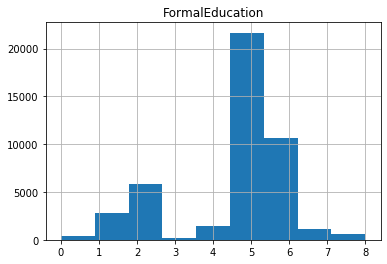

In [107]:
make_histogram('FormalEducation')

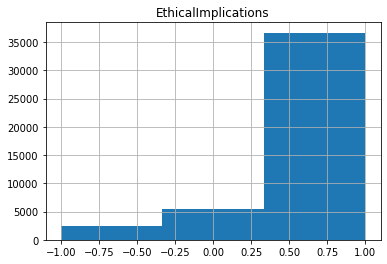

In [108]:
make_histogram('EthicalImplications')

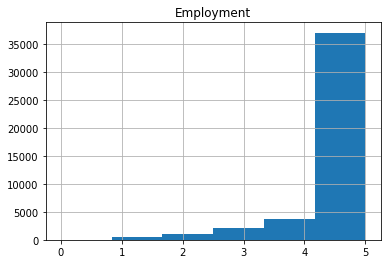

In [109]:
make_histogram('Employment')

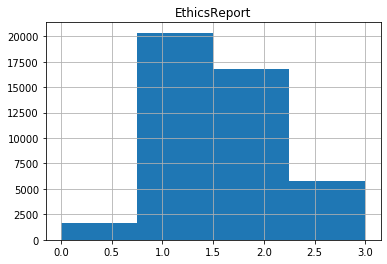

In [110]:
make_histogram('EthicsReport')

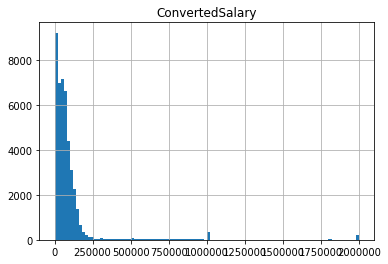

In [111]:
make_histogram('ConvertedSalary', num_bins = 100)

# Get the results of a specific row

In [112]:

quantified_survey_results.iloc[0]

Respondent                 3.0
FormalEducation            5.0
EthicalImplications        1.0
Employment                 5.0
EthicsReport               1.0
ConvertedSalary        70841.0
Name: 1, dtype: float64

# Stratifying

In [132]:
stratified = quantified_survey_results.copy()
stratified = stratified.drop(columns=["Respondent"])
stratified = stratified.groupby(['FormalEducation', 'EthicalImplications'])

## Here is the mean of each strata

In [114]:
stratified.mean()

Employment  EthicsReport  ConvertedSalary
FormalEducation EthicalImplications                                           
0               -1                     2.970588      1.058824     18756.941176
                 0                     3.154930      1.239437     50060.352113
                 1                     3.506173      1.748971     71813.164609
1               -1                     3.907563      1.147059     71930.373950
                 0                     3.959677      1.309140     51841.086022
                 1                     4.079566      1.651899     69671.757233
2               -1                     4.504373      1.169096     85297.825073
                 0                     4.469551      1.298077     72412.607372
                 1                     4.572135      1.652308     96949.120775
3               -1                     3.818182      1.818182    421560.363636
                 0                     3.750000      1.625000     87679.666667
                 1                     4.380165      1.793388    131960.115702
4               -1                     4.820225      1.258427     86627.505618
                 0                     4.750000      1.262500    107727.643750
                 1                     4.659966      1.657454    100043.706868
5               -1                     4.726947      1.263205     70580.633841
                 0                     4.743864      1.347585     76009.896279
                 1                     4.789073      1.660596    102481.382933
6               -1                     4.806678      1.289982     94061.226714
                 0                     4.811544      1.328234     81767.731572
                 1                     4.798067      1.656690    105462.735181
7               -1                     4.914894      1.063830    126808.574468
                 0                     4.732558      1.383721    116682.034884
                 1                     4.825444      1.704142    128062.742604
8               -1                     4.720930      1.209302     81814.302326
                 0                     4.817204      1.419355     69952.967742
                 1                     4.668919      1.581081     86573.900901

### Histagram are easy. Here's a histogram of the mean

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123f44bd0>,
      dtype=object)

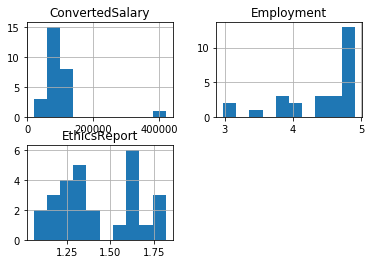

In [115]:
stratified.mean().hist()

In [116]:
# stratified.mean().to_csv('stratified_mean.csv', index=True, encoding='utf-8')

## Mean isn't the only thing we can do. We can also get a specific stata

In [119]:
stratified.get_group((1, 1))
# stratified.mean()

,FormalEducation,EthicalImplications,Employment,EthicsReport,ConvertedSalary
14,1,1,5,3,0.0
114,1,1,5,1,63896.0
160,1,1,3,2,61680.0
173,1,1,5,1,59880.0
177,1,1,5,1,6732.0
...,...,...,...,...,...
89846,1,1,2,1,18350.0
89888,1,1,4,0,800.0
89911,1,1,3,1,10000.0
89922,1,1,1,2,0.0


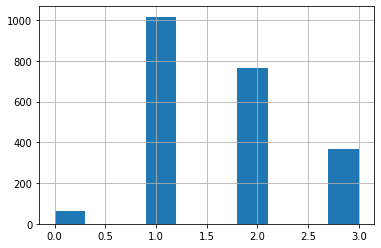

In [122]:
stratified.get_group((1, 1))['EthicsReport'].hist()

In [123]:
len(stratified)

27

# Probability

In [142]:
#note this will go off the quantified_survey_results
data = quantified_survey_results.copy()

def probability (event_string, conditional_string):
    conditioned_data = data.query(conditional_string)
    event_given_conditioned_data = conditioned_data.query(event_string)
    
    return len(event_given_conditioned_data) / len(conditioned_data)

probability('Employment == 5', 'FormalEducation == 1 and EthicalImplications == 1')
    

0.5745931283905967